# Project 1.7 — Maximum Pain Path
### belief (before simulation)
##### Most people implicitly believe:
*“If the system is fair, outcomes should not be extreme enough to break them unless something is wrong.”*

In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def simulate_paths(n_paths = 1000, n_steps = 500):
    paths = []
    seq = []
    for _ in range(n_paths):
        steps = np.random.choice([1, -1], size = n_steps)
        cum = np.cumsum(steps)
        paths.append(cum)
        seq.append(steps)
    return np.array(paths) , np.array(seq)
        
def max_drawdown(path):
    peak = path[0]
    max_dd = 0

    for x in path:
        peak = max(peak, x)
        max_dd = min(max_dd , x-peak)

    return max_dd

def max_streak(seq):
    max_streak = 1
    current_streak = 1

    for i in range(1, len(seq)):
        if seq[i] == seq[i-1]:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 1
    return max_streak


def max_losing_streak(seq):
    losses = (seq == -1).astype(int)
    return max_streak(losses)


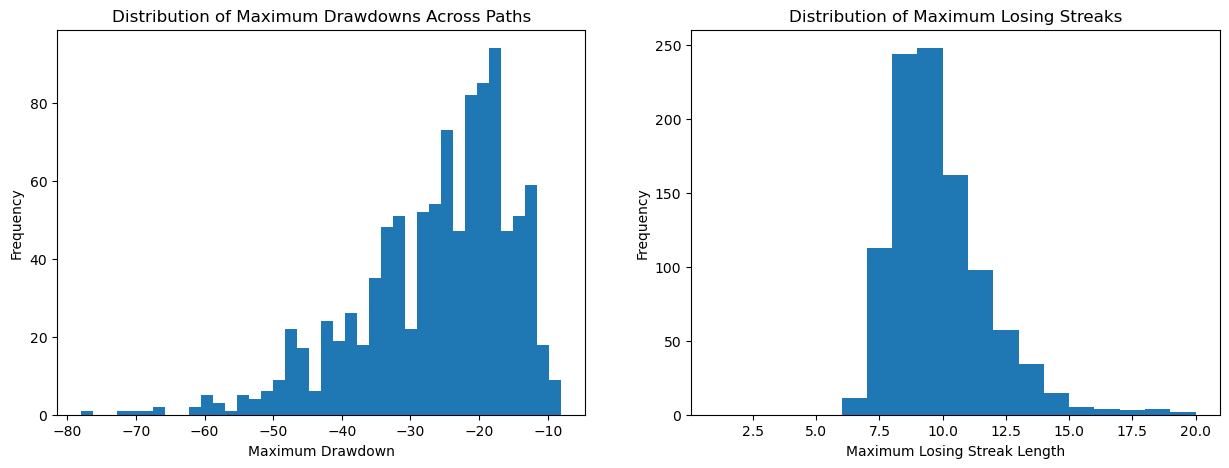

In [93]:
paths, seqs = simulate_paths()
max_dds = np.array([max_drawdown(p) for p in paths])
max_ls  = np.array([max_losing_streak(s) for s in seqs])

fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = (15, 5))
ax[0].hist(max_dds, bins=40)
ax[0].set_xlabel("Maximum Drawdown")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Maximum Drawdowns Across Paths")



ax[1].hist(max_ls, bins = range(1, max(max_ls+2)))
ax[1].set_xlabel('Maximum Losing Streak Length')
ax[1].set_ylabel('Frequency')
ax[1].set_title("Distribution of Maximum Losing Streaks")


plt.show()


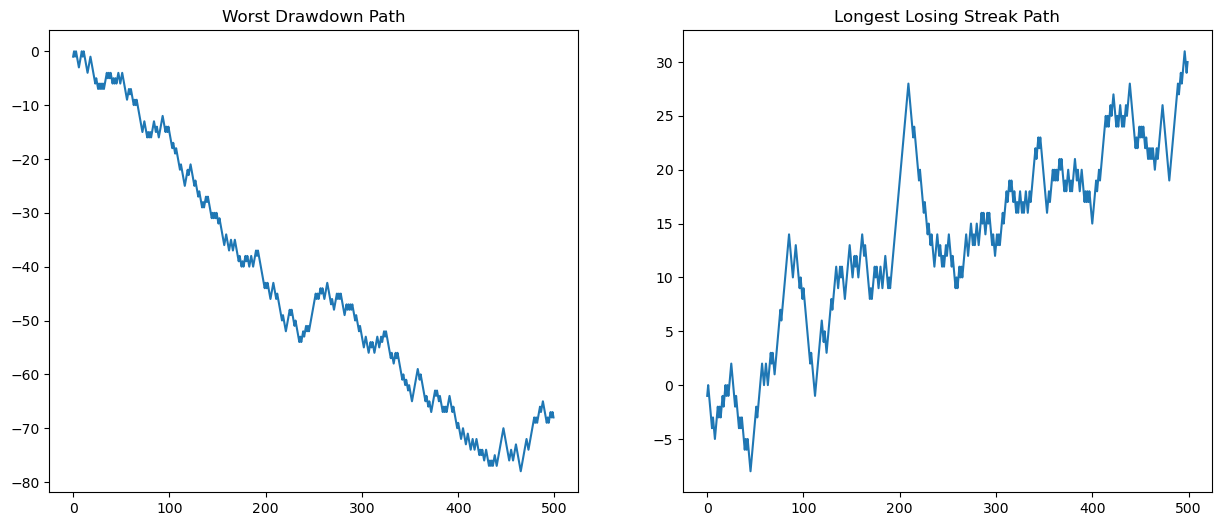

In [94]:
worst_dd_idx = np.argmin(max_dds)
worst_ls_idx = np.argmax(max_ls)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))
ax[0].plot(paths[worst_dd_idx])
ax[0].set_title("Worst Drawdown Path")

ax[1].plot(paths[worst_ls_idx])
ax[1].set_title("Longest Losing Streak Path")
plt.show()


In [95]:
np.percentile(max_ls, [50, 75, 90, 95])

array([ 9., 10., 12., 13.])

# Observations 
### Even in a perfectly fair, unbiased system, a wide range of outcomes naturally occurs. Some paths experience deep drawdowns, some experience prolonged losing streaks, and some experience both simultaneously. These outcomes are not anomalies or evidence of a broken process. They arise inevitably from time and randomness alone.

### The presence of severe drawdowns or extended losing streaks, therefore, is not diagnostic of system failure. They represent normal realizations from the tail of the distribution and must be expected rather than explained away.